# Hello!


Welcome to EDUC W142! 

In this handout, we are going to learn a little bit
more about the sources of data and the indicators most commonly used by international organisations to measure educational inequities. We will also learn a little bit
more about the World Inequality Database in Education (WIDE), a resource com-
piled by UNESCO and the UNESCO Institute of Statistics to support the monitoring
of Sustainable Development Goal (SDG) 4: "Ensure inclusive and equitable quality
education and promote lifelong learning opportunities for all".

First of all, bear in mind that enacting change is always dicult, and it is
impossible to do if there is no information about existing problems. This is where indi-
cators come in. They are statistics that describe key aspects of schooling which permit
the monitoring and evaluation of components of the educational system (e.g.teachers,
programs, schools, students, policies). If well-chosen, a system of indicators can "high-
light disparities, provide a way to explore potential causes, and point toward possible
improvements"

# 1. Sources of Data

Educational indicators are usually estimated from three main sources: house-
hold surveys, census and administrative records. We describe each of these brie
y. For our project, the main source of data will be the World Inequality Database in Ed-
ucation (WIDE), a repository which integrates information from household surveys.

## Census

Most countries collect a census every 10 years. These sources of information
provide comprehensive statistical information for economical and social development
planning of a country. For example, many nations use the results of their decennial
census to allocate funding for education, health services and delineating electoral
districts. However, collecting censuses often requires a large amount of resources to
collect the information of every individual living in the country. Just think about
the number of people that has to be trained to interview each household or input the
information into computers.

### Where to find data

IPUMS : censuses from the US and many more!
      https://www.ipums.org/
      
International IPUMS https://international.ipums.org/international/



## Household Surveys

Household surveys are data collected from a sample of households in a pop-
ulation and then inferences are made to the whole population. Because in sample
surveys there are smaller workloads for interviewers and a longer time period as-
signed to data collection, most subject matters can be covered in greater detail than
in censuses. WIDE relies mostly on the Demographic and Health Surveys (DHS),
which are "nationally-representative household surveys that provide data for a wide
range of monitoring and impact evaluation indicators in the areas of population,
health, and nutrition.". It also compiles information from the Multiple Indicator
Cluster Surveys (MICS) collected by UNICEF.


### Where to find data

Demographic and Health surveys http://www.dhsprogram.com/

-World bank http://data.worldbank.org/

-Multiple Indicator Cluster Surveys (MICS) https://mics.unicef.org

-LSMS (search for LSMS on the world bank data page)

-Rand public-use databases http://www.rand.org/labor/data.html

## Administrative Data

Administrative data generally includes information from a census of schools
and include information related to administering programs. There are several advantages of using this type of data: since most governments collect comprehensive
information about students, schools and teachers, it is possible to study the effects of
policies in groups that are usually left out or not well included in household surveys
(for example the very rich or the very poor). Another advantage is the large sample
sizes, which allows researchers to gain statistical power.

### Where to find data

Data.gov: Datasets generated by the executive branch of the
US government http://www.data.gov/

ICPSR http://www.icpsr.umich.edu/icpsrweb/ICPSR/: A data repository with many data sets on lots of subjects

## Exercise

In a group, try to identify what kind of information, sources and estimation
you will need if you were asked to report on the attendance rate of a given country.
From the rate, we know that we will estimate a proportion: What number should go in the numerator and what number in the denominator? What sources of data would you use to obtain each information?

# The World Inequality Database in Education (WIDE)

WIDE brings together data from Demographic and Health Surveys (DHS),
Multiple Indicator Cluster Surveys (MICS), other national household surveys and
learning assessments from over 160 countries. Users can compare education outcomes
between countries, and between groups within countries, according to factors that are
associated with inequality, including wealth, gender, and ethnicity and location. It is
currently used to support the monitoring of the Sustainable Development Goal (SDG)
4: "Ensure inclusive and equitable quality education and promote lifelong learning
opportunities for all" For the assignment, you will be asked to identify one set of indicators (one
set is composed of three indicators) and analyse it through three characteristics of
your choice (e.g. Sex, wealth, location, for example). If you are working in pairs,
you are expected to work with two sets of indicators. You can see a list of available
indicators here (https://www.education-inequalities.org/indicators).

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os, time, math, random
import seaborn as sns
import scipy

In [2]:
!wget https://us-east-1-unesco-wide.s3.us-east-1.amazonaws.com/WIDE_2021-01-28_v1.csv -q --show-progress
!wget https://us-east-1-unesco-wide.s3.us-east-1.amazonaws.com/WIDE_metadata_2021-01-29.csv -q --show-progress

WIDE_2021-01-28_v1. 100%[===================>]  50.58M  71.3MB/s    in 0.7s    
WIDE_metadata_2021- 100%[===================>] 268.41K  --.-KB/s    in 0.1s    


In [3]:
wide=pd.read_csv("WIDE_2021-01-28_v1.csv", low_memory=False)

In [4]:
wide.head(3)

,iso_code,region_group,income_group,country,survey,year,level,grade,category,Sex,...,rlevel3_m,rlevel3_no,slevel3_m,slevel3_no,mlevel4_m,mlevel4_no,rlevel4_m,rlevel4_no,slevel4_m,slevel4_no
0,AFG,Central and Southern Asia,Low income countries,Afghanistan,DHS,2015.0,NaN,NaN,Ethnicity,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,AFG,Central and Southern Asia,Low income countries,Afghanistan,DHS,2015.0,NaN,NaN,Ethnicity,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,AFG,Central and Southern Asia,Low income countries,Afghanistan,DHS,2015.0,NaN,NaN,Ethnicity,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


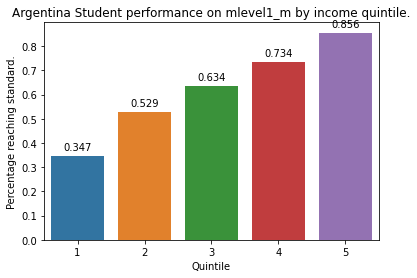

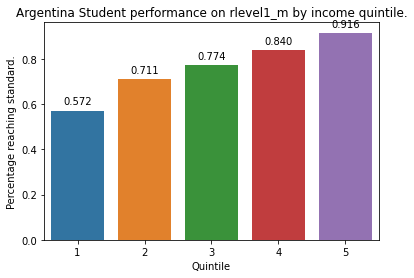

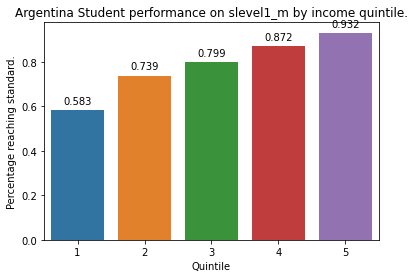

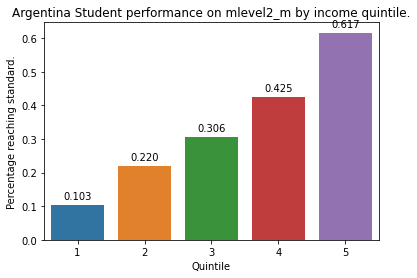

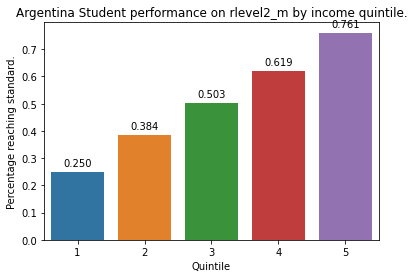

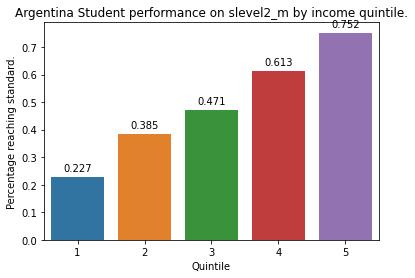

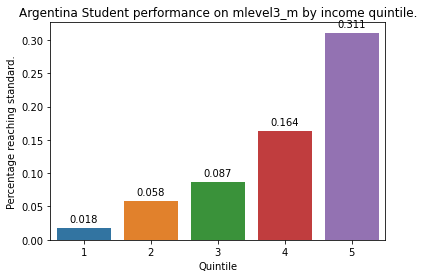

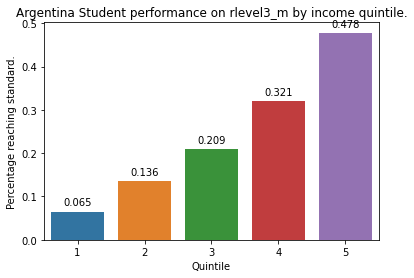

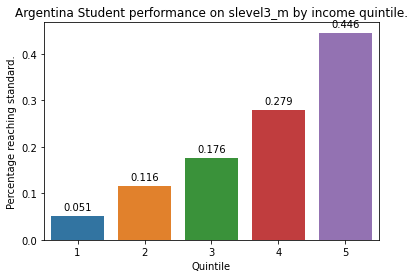

Gross Inequality: 0.4330179764082512


In [6]:
wide=wide
YEAR = 2018
EXPLORED_DIFFERENCE = 'Wealth'
nation_to_explore = 'Argentina'
wide = wide[wide['year'] == YEAR]
wide = wide[wide['category'] == EXPLORED_DIFFERENCE]
wide = wide[wide['country'] == nation_to_explore]
#scipy.stats.variation()
wide = wide[wide['survey'] == 'PISA']
wide.dropna(axis=1)
gross_inequality = []
subset_wide =  wide.dropna(axis=1).select_dtypes(exclude='object').drop(['year'],axis=1)
for indicator in subset_wide:
    if pd.isnull(scipy.stats.variation(subset_wide[indicator])): 
        #print(scipy.stats.variation(subset_wide[indicator]).dtype)
        continue
    if "_m" in indicator:
        #print(indicator, scipy.stats.variation(subset_wide[indicator]))
        gross_inequality.append(scipy.stats.variation(subset_wide[indicator]))
        #print(wide['Wealth'],subset_wide[indicator])
        splot = sns.barplot(x=[1,2,3,4,5],y=subset_wide[indicator])
        plt.title("Argentina Student performance on "+indicator+" by income quintile.")
        plt.xlabel('Quintile'); plt.ylabel('Percentage reaching standard.')
        for p in splot.patches: # Annotate bars
            splot.annotate(format(p.get_height(), '.3f'), 
                           (p.get_x() + p.get_width() / 2., p.get_height()), 
                           ha = 'center', va = 'center', 
                           xytext = (0, 9), 
                           textcoords = 'offset points')
        plt.show()
#print(scipy.stats.variation(subset_wide[indicator]))
if len(gross_inequality) > 0:
    gross_inequality = np.mean(gross_inequality)
print("Gross Inequality:",gross_inequality)

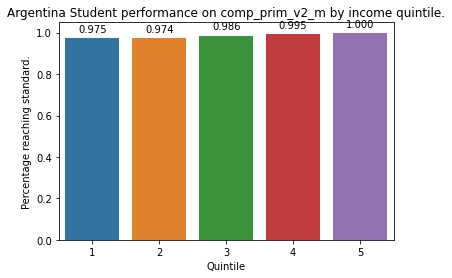

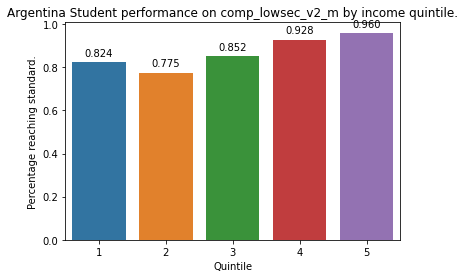

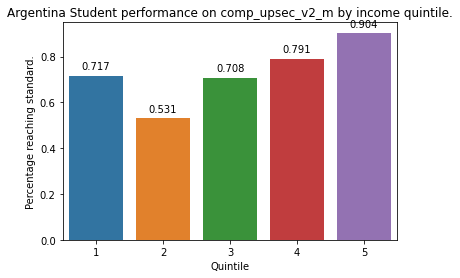

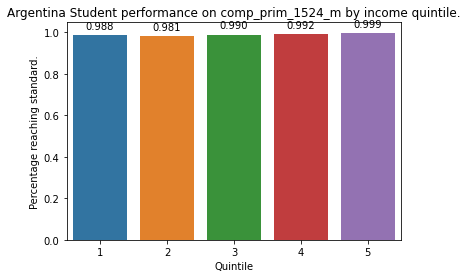

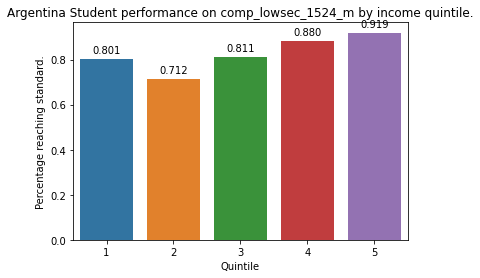

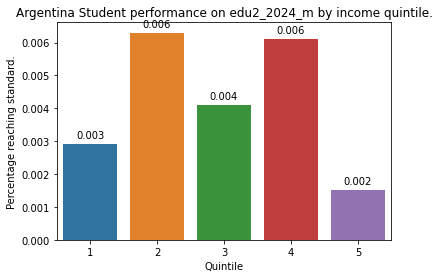

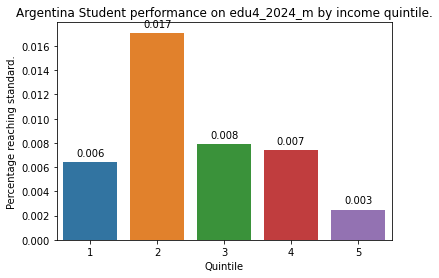

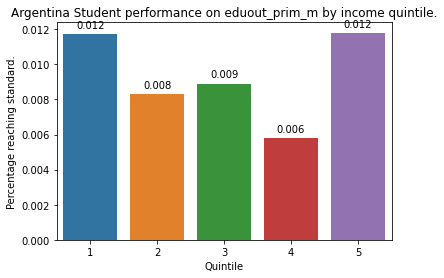

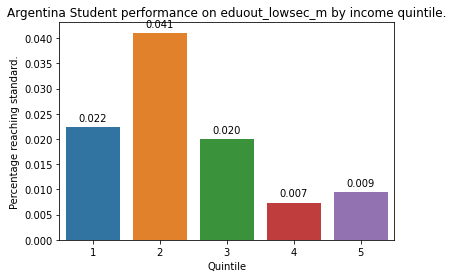

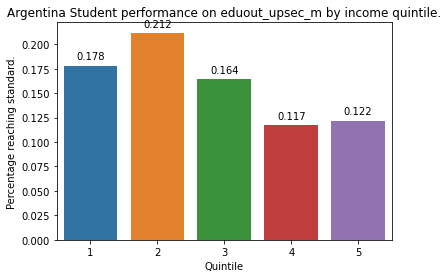

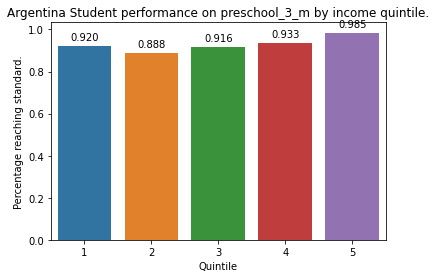

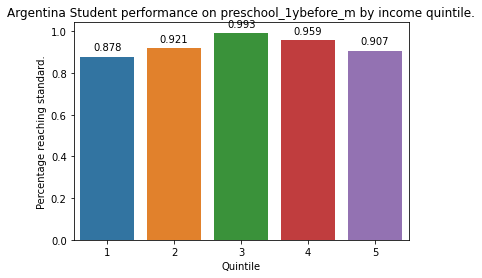

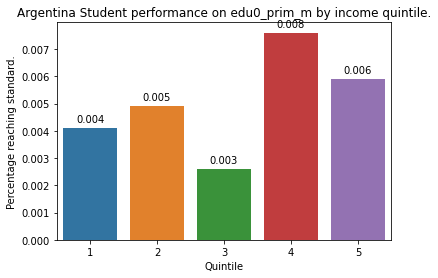

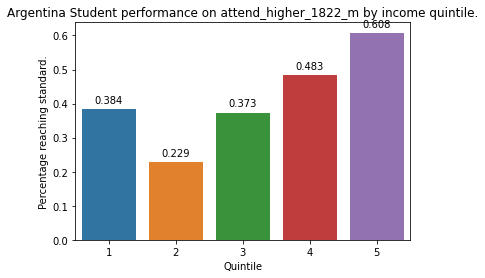

Gross Inequality: 0.22502727360209998


In [5]:
wide=wide
YEAR = 2019
EXPLORED_DIFFERENCE = 'Wealth'
nation_to_explore = 'Argentina'
wide = wide[wide['year'] == YEAR]
wide = wide[wide['category'] == EXPLORED_DIFFERENCE]
wide = wide[wide['country'] == nation_to_explore]
#scipy.stats.variation()
wide = wide[wide['survey'] == 'EPH']
wide.dropna(axis=1)
gross_inequality = []
subset_wide =  wide.dropna(axis=1).select_dtypes(exclude='object').drop(['year'],axis=1)
for indicator in subset_wide:
    if pd.isnull(scipy.stats.variation(subset_wide[indicator])): 
        #print(scipy.stats.variation(subset_wide[indicator]).dtype)
        continue
    if "_m" in indicator:
        #print(indicator, scipy.stats.variation(subset_wide[indicator]))
        gross_inequality.append(scipy.stats.variation(subset_wide[indicator]))
        #print(wide['Wealth'],subset_wide[indicator])
        splot = sns.barplot(x=[1,2,3,4,5],y=subset_wide[indicator])
        plt.title("Argentina Student performance on "+indicator+" by income quintile.")
        plt.xlabel('Quintile'); plt.ylabel('Percentage reaching standard.')
        for p in splot.patches: # Annotate bars
            splot.annotate(format(p.get_height(), '.3f'), 
                           (p.get_x() + p.get_width() / 2., p.get_height()), 
                           ha = 'center', va = 'center', 
                           xytext = (0, 9), 
                           textcoords = 'offset points')
        plt.show()
#print(scipy.stats.variation(subset_wide[indicator]))
if len(gross_inequality) > 0:
    gross_inequality = np.mean(gross_inequality)
print("Gross Inequality:",gross_inequality)